# 4.9 task pt. 2

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\\Users\\figue\\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custmr_merge.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,dependants,relationship_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [5]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'dependants', 'relationship_status', 'income', '_merge'],
      dtype='object')

## Q2)

### Creating Random Samples

In [6]:
np.random.seed(4)

In [7]:
dev = np.random.rand(len(df)) <= 0.7

In [8]:
big = df[dev]

In [9]:
small = df[~dev]

#### Checking sample is correct

In [10]:
df.shape

(32404859, 34)

In [11]:
len(df)

32404859

In [12]:
len(big)

22683761

In [13]:
len(small)

9721098

In [14]:
len(big) + len(small)

32404859

## Q3)

### HistoGram

Text(0.5, 0, 'Hour')

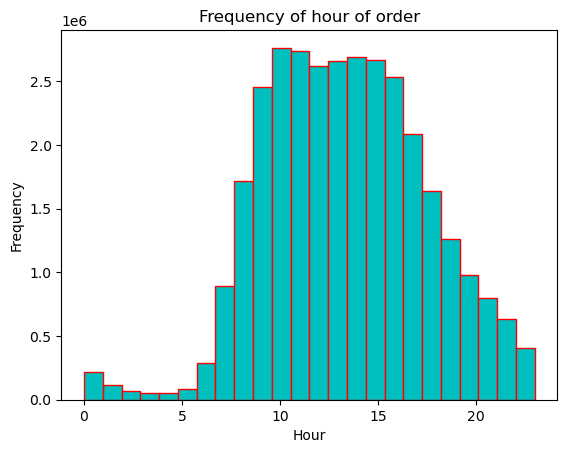

In [15]:
hist = df['order_hour_of_day'].plot.hist(bins = 24, rwidth = 1, color = 'c', ec = 'red', range=[0,23])
plt.title('Frequency of hour of order')
plt.ylabel('Frequency')
plt.xlabel('Hour')

We can see  that orders are more likely to be placed between 10am - 3pm.

In [16]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_freq_hoo.png'))

## Q4)

### Bar Chart

#### Grouping data  for Bar  Chart

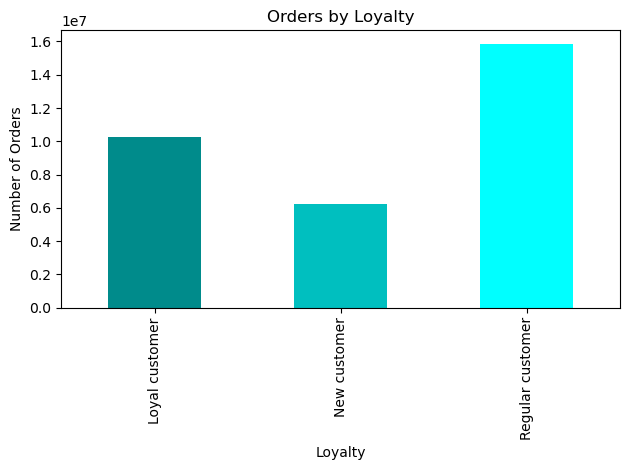

In [27]:
bar = df['loyalty_flag'].value_counts().sort_index().plot.bar(color =['darkcyan', 'c', 'aqua'])
plt.title('Orders by Loyalty')
plt.ylabel('Number of Orders')
plt.xlabel('Loyalty')
plt.tight_layout()

In [28]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty.png'))

## Q5)

### Line Chart

In [19]:
df_2=small[['order_hour_of_day', 'prices']]

C:\Users\figue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\figue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Hour of Day')

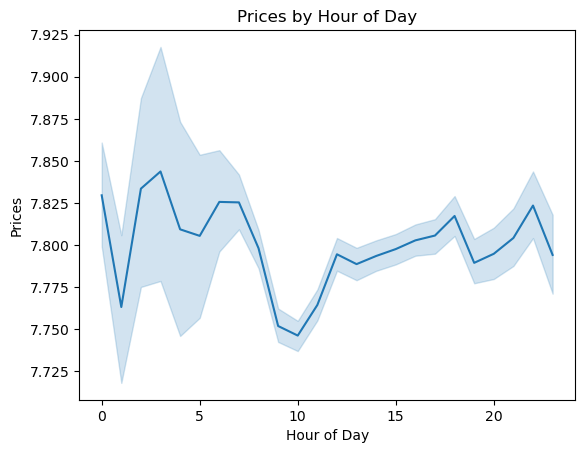

In [20]:
line_order_hour_of_day=sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')
plt.title('Prices by Hour of Day')
plt.ylabel('Prices')
plt.xlabel('Hour of Day')

In [21]:
line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day.png'))

## Q6)

### Line Chart

In [22]:
df_3=small[['dependants', 'age']]

C:\Users\figue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\figue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age')

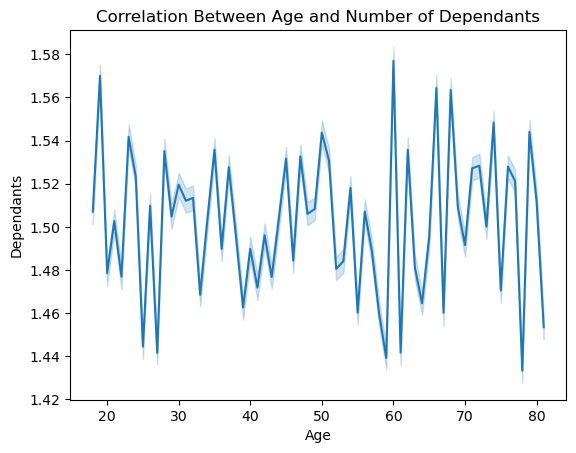

In [23]:
line_dependants=sns.lineplot(data=df_3, x='age', y='dependants')
plt.title('Correlation Between Age and Number of Dependants')
plt.ylabel('Dependants')
plt.xlabel('Age')

There is no correlation between age and the number of  dependants.

In [24]:
line_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependants.png'))

## Q7)

### Scatterplot

Text(0.5, 0, 'Age')

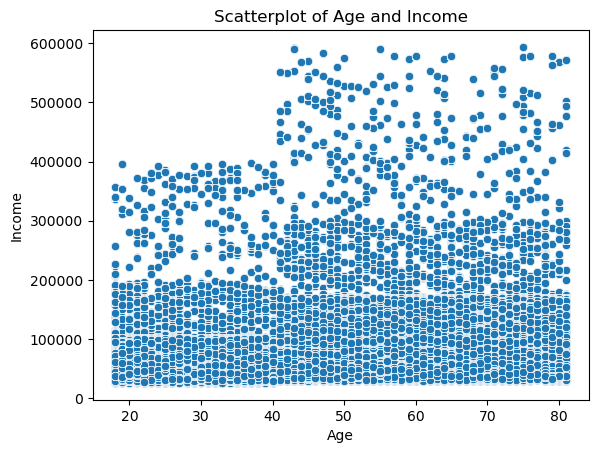

In [25]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df)
plt.title('Scatterplot of Age and Income')
plt.ylabel('Income')
plt.xlabel('Age')

We can see that throughout all of the ages  around 20,000 to 200,000 income is very common. Additionally once  individuals reach 40+ years of age, it looks like there is a dense population that make between 200,000 to 300,000. 

In [26]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))